#### Pavan Kumar Srikanth Naik (pavankumar.s.naik@gmail.com)

In [1]:
#importing packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('screening_exercise_orders.csv')

In [3]:
df.describe()

,customer_id,gender,value,predicted_gender
count,13471.000000,13471.000000,13471.000000,13471.000000
mean,5033.693564,0.498256,357.322179,0.642788
std,2500.179222,0.500016,387.210821,0.479196
min,1000.000000,0.000000,0.000000,0.000000
25%,2890.500000,0.000000,161.200000,0.000000
50%,4850.000000,0.000000,258.000000,1.000000
75%,7157.000000,1.000000,426.000000,1.000000
max,9813.000000,1.000000,8046.300000,1.000000


In [4]:
df.isnull().count()

customer_id         13471
gender              13471
date                13471
value               13471
predicted_gender    13471
dtype: int64

We can see from the above output that there are 13471 rows and there are no null values in any column in the given dataset.

### A) Sort the dataframe by customer_id ascending and display the first 10 rows.

In [5]:
# Computing order_count (number of orders placed by each customer) by counting the customer IDs and converting it to a dataframe.
order_count = df['customer_id'].value_counts()
count_df = order_count.to_frame().reset_index()
count_df.columns = ['customer_id','order_count']

In [6]:
# Showing the most recent orders by grouping customers and gender, and sorting by recent date for each group
recentorder = df.groupby(['customer_id','gender'], sort=False)['date'].max()
recentorder_df = recentorder.to_frame().reset_index()
recentorder_df.columns = ['customer_id','gender','most_recent_order_date']

In [7]:
# Joining dataframes 
orders_df = recentorder_df.set_index('customer_id').join(count_df.set_index('customer_id'))

In [8]:
#Displaying the top 10 rows 

orders_df.head(10)

,gender,most_recent_order_date,order_count
customer_id,,,
1000,0,2017-01-01 00:11:31,1
1001,0,2017-01-01 00:29:56,1
1002,1,2017-02-19 21:35:31,3
1003,1,2017-04-26 02:37:20,4
1004,0,2017-01-01 03:11:54,1
1005,1,2017-12-16 01:39:27,2
1006,1,2017-05-09 15:27:20,3
1007,0,2017-01-01 15:59:50,1
1008,0,2017-12-17 05:47:48,3


### B) Plot the count of orders per week for the store.

In [9]:
#Formatted datetime values to extract the week values, and grouped the data to count total weekly orders.
df['date'] = pd.to_datetime(df['date'])
df['week'] = df.date.dt.strftime('%U')
week_count = df.groupby(['week'])['value'].count()
week_count.columns = ['Orders per Week', 'week']

/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


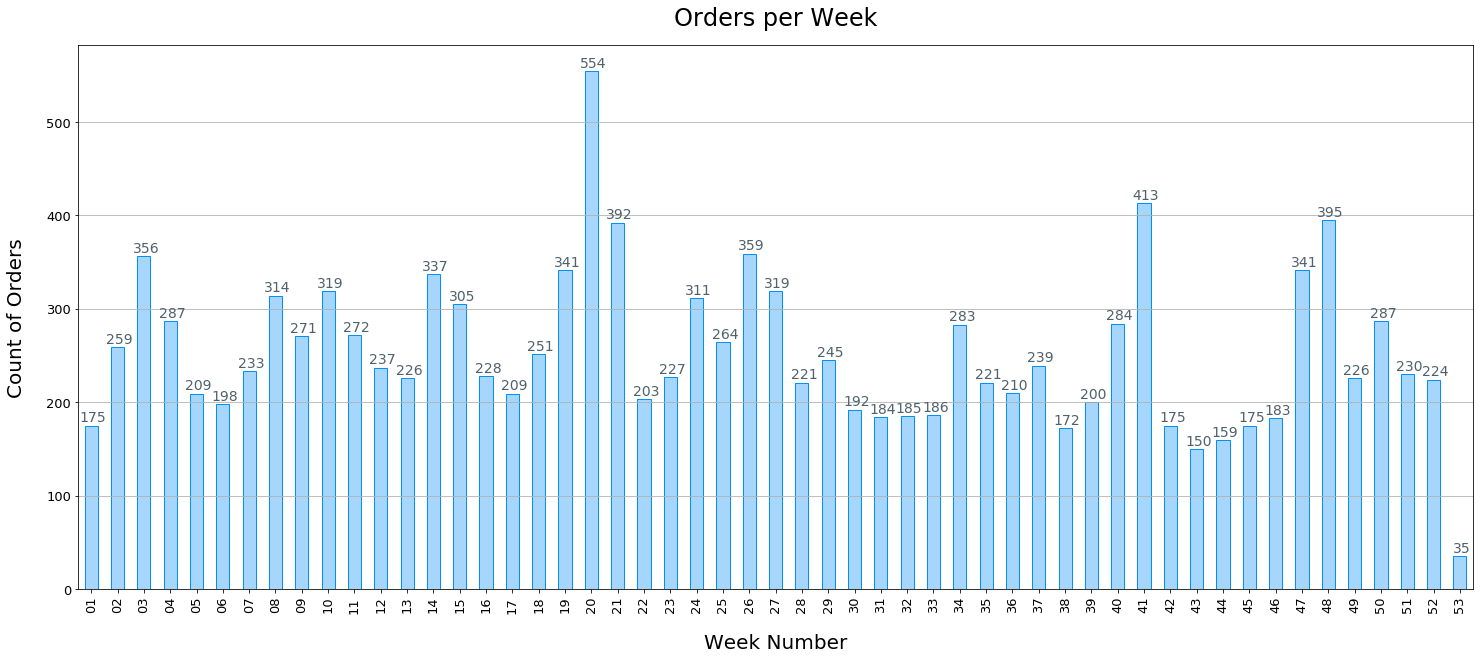

In [10]:
"""Plotting count of orders for each week of the year. Used Horizontal lines for the background to get a glimpse of 
    weeks where the count exceeded certain threshold"""

ax = week_count.plot.bar(colors="#A6D6FB", figsize=(25,10), fontsize=13, edgecolor='#008FFF')
for i in ax.patches:
    ax.annotate(np.round(i.get_height()), (i.get_x()+i.get_width()/2, i.get_height()),
         ha='center', va='center', color='#4F616B',fontsize =14,
         xytext=(2,8), textcoords='offset points')
ax.yaxis.grid()
ax.set_title('Orders per Week', fontsize=24, color='black', pad=20)
plt.ylabel('Count of Orders',fontsize=20, color='black')
plt.xlabel('Week Number',fontsize=20, color='black')
ax.yaxis.labelpad = 20
ax.xaxis.labelpad = 20
plt.show()

### C) Compute the mean order value for gender 0 and for gender 1. Do you think the difference is significant? Justify your choice of method.

In [11]:
mu = df.groupby('gender')['value'].mean()
print("Mean order value for:", mu)

Mean order value for: gender
0    363.890006
1    350.708361
Name: value, dtype: float64


#### Performing t-test to check for p-value with 95% confidence over the significant differnce.
Null Hypothesis: Mean values of gender 0 and gender 1 are not signficantly different

Alternate Hypothesis: Mean values of gender 0 and gender 1 are significantly different

In [12]:
#variance
var = df.groupby('gender')['value'].var(ddof=1)

In [13]:
#standard deviation
sd = np.sqrt((var[0] + var[1])/2)

In [14]:
N = (df['customer_id'].count())/2
#t-statistic
tt = (mu[0] - mu[1])/(sd*np.sqrt(2/N))

#p-value 
pval = stats.t.sf(np.abs(tt), N-1)*2

In [15]:
print("t-value: "+ str(tt) + " p-value: " + str(pval))

t-value: 1.9759505628067568 p-value: 0.04820112750826186


We have used t-test to check for p-value to see if the difference in mean for gender 0 and gender 1 is significantly different. 
It can be seen that the p-value is 0.048 which is less than 0.05 (threshold), hence rejecting the null hypothesis with 95% confidence.
##### The mean values of gender 0 and gender 1 are significantly different.

### D) Generate a confusion matrix for the gender predictions of customers in this dataset. You can assume that there is only one gender prediction for each customer. What does the confusion matrix tell you about the quality of the predictions?

In [16]:
cm=confusion_matrix(df['gender'] , df['predicted_gender'])
print(cm)

[[3349 3410]
 [1463 5249]]


As we can see from the confusion matrix, 

True Positive - 3349 &emsp; &emsp; False Negative - 3410

False Positive - 1463 &emsp; &ensp; True Negative - 5249

In [17]:
print(classification_report(df['gender'] , df['predicted_gender']))

              precision    recall  f1-score   support

           0       0.70      0.50      0.58      6759
           1       0.61      0.78      0.68      6712

    accuracy                           0.64     13471
   macro avg       0.65      0.64      0.63     13471
weighted avg       0.65      0.64      0.63     13471



#### The confusion matrix and the classification report indicates that the quality of prediction is decent as we can see it has a precision of 0.65 to classify gender 0 and gender 1, and also it has approximately the same recall and F1 - score. 

### E) Describe one of your favorite tools or techniques and give a small example of how it has helped you solve a problem. Limit your answer to one paragraph, and please be specific.

My favorite tool to work with is Python. I have worked on many projects that involved end to end pipelining of Data Science. A key benefit of using python is that it offers access to a wide variety of data analysis and data science libraries. Pandas, NumPy, SciPy, StatsModels, scikit-learn, Seaborn, matPlotLib are some of the many available libraries that I love to use in most of my projects. The most recent project that I have worked on is based on the ongoing COVID-19 pandemic. I collected the data from JHU/WHO repositories and cleaned the data using data munging/wrangling techniques, and drew meaningful insights using plotly/foliam packages with respect to the confirmed/recovered/mortality cases and forecasted in a time series prediction using Facebook's prophet model. All the visualizations and plots were then formulated into a stand alone dashboard using Voila.